# About the Project

This project aims to develop a predictive model to estimate the number of calories burned by an individual during a workout. By analyzing key factors such as exercise type, duration, intensity, and user-specific attributes like age, weight, and fitness level, the model provides accurate calorie expenditure predictions. The goal is to support fitness enthusiasts, trainers, and health applications in optimizing workout plans and tracking energy expenditure effectively.

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn
%matplotlib inline

In [10]:
df = pd.read_csv(r"C:\Users\THINKPAD\Documents\Datasets\Calories Burnt Predictor\calories.csv")

In [12]:
df.shape

(15000, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [16]:
df.head(4)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0


In [18]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

The dataset shows an almost equal distribution between the genders.

In [20]:
df = df.drop('User_ID', axis = 1)

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


In [30]:
# check for duplicates in the dataset
df.duplicated().sum()

1

In [35]:
# drop the duplicate entry
df = df.drop_duplicates(keep='first')

In [37]:
df.corr(numeric_only=True)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009512,0.090038,0.013202,0.010449,0.013136,0.154356
Height,0.009512,1.000000,0.958452,-0.004664,0.000500,0.001167,0.017499
Weight,0.090038,0.958452,1.000000,-0.001940,0.004271,0.004048,0.035426
Duration,0.013202,-0.004664,-0.001940,1.000000,0.852866,0.903164,0.955419
Heart_Rate,0.010449,0.000500,0.004271,0.852866,1.000000,0.771523,0.897880
Body_Temp,0.013136,0.001167,0.004048,0.903164,0.771523,1.000000,0.824552
Calories,0.154356,0.017499,0.035426,0.955419,0.897880,0.824552,1.000000


From the correlation matrix, we see;
- **strong correlation to calories burnt**: Duration (0.96), Heart Rate (0.90) and Body Temp (0.82) which implies calorie expenditure is driven by physical effort and physiological responses.
  
- **weak/moderate correlation** : Age (0.15), Height (0.017), Weight (0.03) show weak correlation with calories burned.

- **Multicolinearity**: Weight and Height (0.96)

## Exploratory Data Analysis

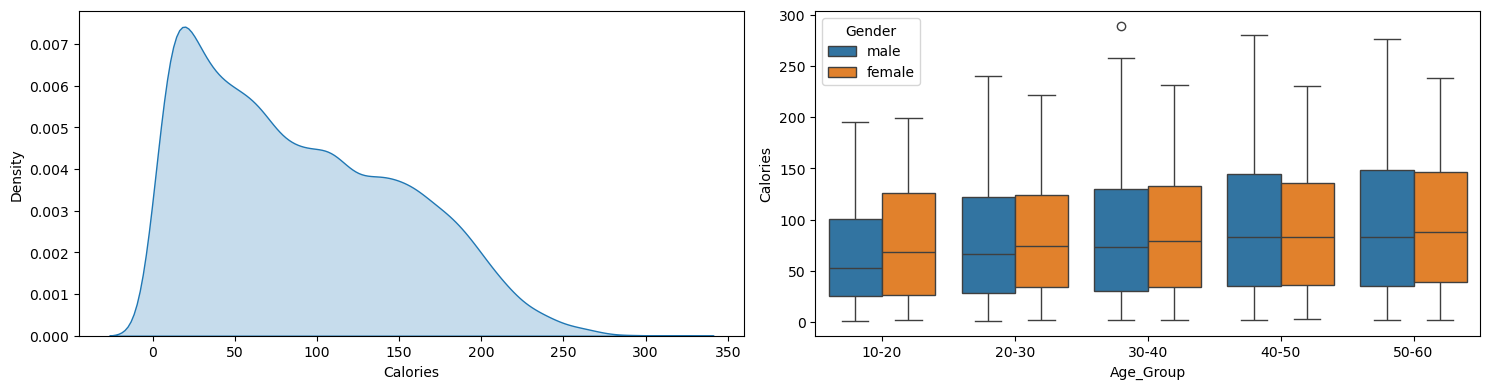

In [112]:
fig, ax = plt.subplots(1, 2, figsize = (15,4))

sbn.kdeplot(df['Calories'], fill = True, ax = ax[0])

df['Age_Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60],
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60'])

sbn.boxplot(data=df, x='Age_Group', y='Calories', hue='Gender', ax=ax[1])


plt.tight_layout()
plt.show()

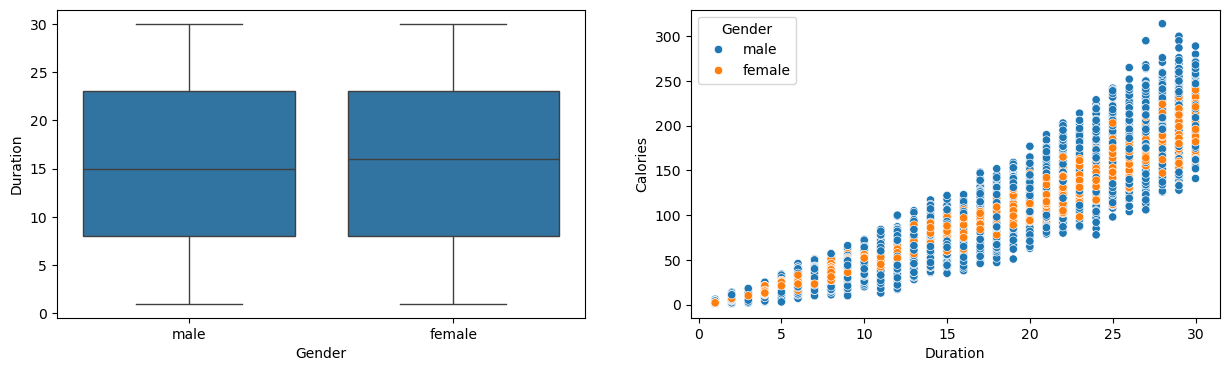

In [89]:
# Average duration of exercise by gender and how it affects calorie expenditure
fig, ax = plt.subplots(1, 2, figsize = (15,4))

sbn.boxplot(data = df, x = 'Gender', y = 'Duration', ax = ax[0])

sbn.scatterplot(data = df, x = 'Duration', y = 'Calories', hue = 'Gender', ax = ax[1])

plt.show()

**Overall Deductions**

Duration is the primary driver of calorie expenditure across both genders.

There's no significant difference in how long males and females exercise, but the calories burned differ slightly, possibly due to intensity or physical differences.

Older individuals tend to burn slightly more calories during exercise, with males generally burning a bit more than females across all age groups, though the differences are modest and overlapping.

In [115]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'Age_Group'],
      dtype='object')

In [123]:
encoded_gender = pd.get_dummies(df['Gender'], drop_first=True, dtype = 'int')
df = pd.concat([df, encoded_gender], axis = 1).drop(['Gender', 'Age_Group'], axis = 1)

In [127]:
X = df.drop('Calories', axis = 1)
y = df['Calories']

In [129]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [133]:
sc = StandardScaler()

In [135]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [137]:
base_model = Ridge()

In [141]:
base_model.fit(X_train, y_train)

Ridge()

In [143]:
ridge_pred = base_model.predict(X_test)

In [147]:
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, ridge_pred))
print('R2_Score :', r2_score(y_test, ridge_pred))

Root Mean Squared Error:  11.348001599723222
R2_Score : 0.966775299268732


## Hyperparameter Tuning

In [150]:
# Define hyperparameter

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'cholesky', 'lsqr', 'sag', 'saga']
}

In [156]:
grid_model = GridSearchCV(
    estimator = base_model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1
)

In [158]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'solver': ['auto', 'cholesky', 'lsqr', 'sag', 'saga']},
             scoring='neg_root_mean_squared_error')

In [160]:
print("Best parameters: ", grid_model.best_params_)
print("Best score: ", grid_model.best_score_)

Best parameters:  {'alpha': 0.1, 'solver': 'sag'}
Best score:  -11.296293834426555


### Using the Best Model from GridSearchCV to make predictions

In [163]:
best_model = grid_model.best_estimator_

In [165]:
y_pred = best_model.predict(X_test)

In [169]:
print("R2 score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 score: 0.9667752254726018
RMSE: 11.348014202367038


## Residual Analysis, Model Visual Performance and Feature Contribution

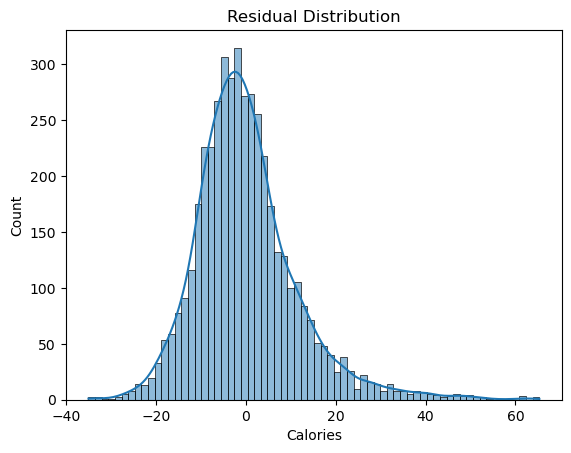

In [186]:
# residual 
residual = y_test - y_pred

sbn.histplot(residual, kde = True)
plt.title('Residual Distribution')
plt.show()

The model's residuals are approximately normally distributed and centered around zero, indicating good predictive performance with minor underestimation in a few high-calorie cases.

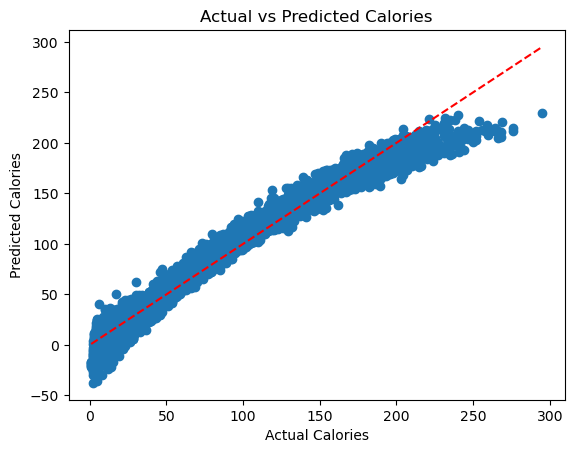

In [190]:
# Actual Calorie Expenditure v Predicted Expenditure
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [198]:
pd.DataFrame(data = best_model.coef_, index=X.columns, columns = ['Feature Importance']).sort_values(by = ['Feature Importance'], ascending=False)

,Feature Importance
Duration,55.396416
Heart_Rate,19.103473
Age,8.497603
Weight,4.360255
male,-0.577137
Height,-2.555919
Body_Temp,-13.247150
